In [1]:
# Let's import our imports ;)
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux
    


In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux

In [3]:
df = acquire.get_telco_data()

In [4]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [7]:
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')

In [8]:
df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_39701/3673192903.py:3: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df.total_charges.value_counts(dropna=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
df.total_charges.isnull().value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
train, validate, test = prepare.split_data(df, 'churn')

Prepared df: (7043, 22)

Train: (4225, 22)
Validate: (1409, 22)
Test: (1409, 22)


In [22]:
# Here we are going to start examining our training data 
# First let's print the commands to look at every individual field and how it realates to churn
for i in train:
    print(f"sns.histplot(data=train, y='{i}', hue='churn', multiple='stack')")
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")

sns.histplot(data=train, y='customer_id', hue='churn', multiple='stack')
train['customer_id'][df.churn == 'Yes'].value_counts()
train['customer_id'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
train['gender'][df.churn == 'Yes'].value_counts()
train['gender'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack')
train['senior_citizen'][df.churn == 'Yes'].value_counts()
train['senior_citizen'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
train['partner'][df.churn == 'Yes'].value_counts()
train['partner'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack')
train['dependents'][df.churn == 'Yes'].value_counts()
train['dependents'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
train['tenure'][df.churn == 'Yes'].value_co

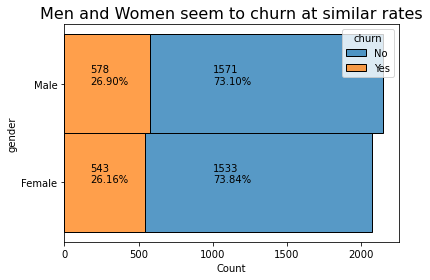

In [106]:
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
plt.title('Men and Women seem to churn at similar rates',fontdict={'fontsize':16})
plt.text(175,'Male',f'578\n{Percent(578/(578+1571))}')
plt.text(175,"Female", f'543\n{Percent(543/(543+1533))}')
plt.text(1000,'Male', f'1571\n{Percent(1571/(578+1571))}')
plt.text(1000,'Female', f'1533\n{Percent(1533/(543+1533))}')
plt.show()

In [100]:
train['gender'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [28]:
train['gender'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

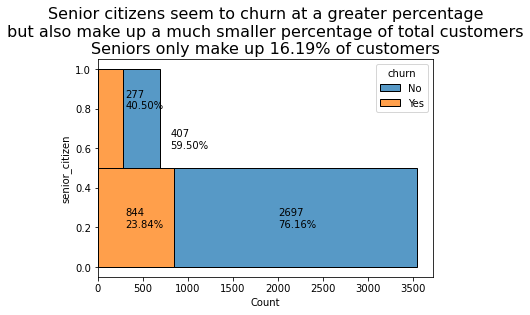

In [176]:
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack', bins=2)
plt.text(300,.8,f'277\n{Percent(277/(277+407))}')
plt.text(800,.6,f'407\n{Percent(407/(277+407))}')
plt.text(300,.2,f'844\n{Percent(844/(844+2697))}')
plt.text(2000,.2,f'2697\n{Percent(2697/(844+2697))}')
plt.title(f'Senior citizens seem to churn at a greater percentage\n\
but also make up a much smaller percentage of total customers\n\
Seniors only make up {Percent((277+407)/(277+407+844+2697))} of customers',
          fontdict={'fontsize':16}
         )
plt.show()

In [30]:
train['senior_citizen'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
train['senior_citizen'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

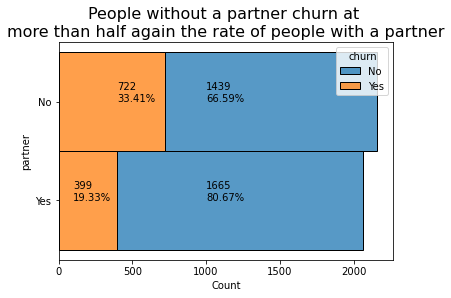

In [135]:
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
plt.title('People without a partner churn at \n\
more than half again the rate of people with a partner',
         fontdict={'fontsize':16})
plt.text(400, 'No', f'722\n{Percent(722/(722+1439))}')
plt.text(1000, 'No', f'1439\n{Percent(1439/(722+1439))}')
plt.text(100, 'Yes', f'399\n{Percent(399/(399+1665))}')
plt.text(1000, 'Yes', f'1665\n{Percent(1665/(399+1665))}')
plt.show()

In [33]:
train['partner'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [34]:
train['partner'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

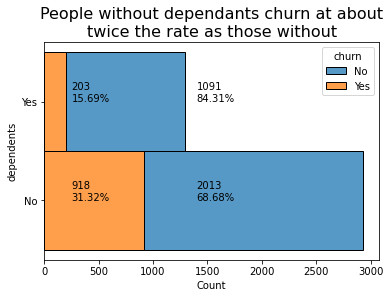

In [177]:
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack',)# kde=True)

plt.title('People without dependants churn at about\n\
twice the rate as those without',fontdict={'fontsize':16})

plt.text(250, 'Yes', f'{203}\n{Percent(203/(203+1091))}')
plt.text(1400, 'Yes', f'{1091}\n{Percent(1091/(203+1091))}')
plt.text(250, 'No', f'{918}\n{Percent(918/(918+2013))}')
plt.text(1400, 'No', f'{2013}\n{Percent(2013/(918+2013))}')

plt.show()

In [36]:
train['dependents'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
train['dependents'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

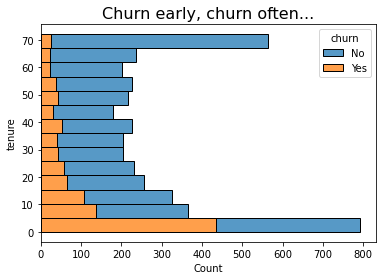

In [158]:
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
plt.title('Churn early, churn often...',fontdict={'fontsize':16})
plt.show()

In [39]:
train['tenure'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [40]:
train['tenure'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

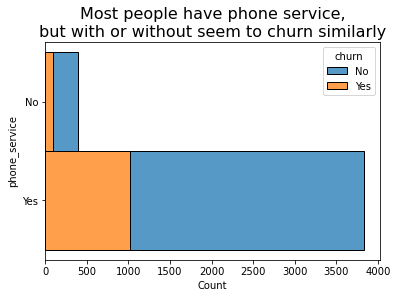

In [159]:
sns.histplot(data=train, y='phone_service', hue='churn', multiple='stack')
plt.title('Most people have phone service,\nbut with or without seem to churn similarly',
          fontdict={'fontsize':16}
         )
plt.show()

In [42]:
train['phone_service'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [43]:
train['phone_service'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

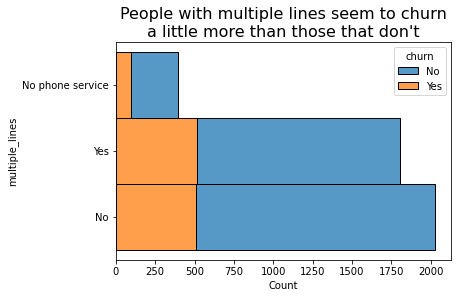

In [162]:
sns.histplot(data=train, y='multiple_lines', hue='churn', multiple='stack')
plt.title('People with multiple lines seem to churn\na little more than those that don\'t',
          fontdict={'fontsize':16}
         )
plt.show()

In [114]:
ml_chr_yes = train['multiple_lines'][df.churn == 'Yes'].value_counts()
ml_chr_yes

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [115]:
ml_chr_no = train['multiple_lines'][df.churn == 'No'].value_counts()
ml_chr_no

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [117]:
ml_chr_yes / (ml_chr_yes + ml_chr_no)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

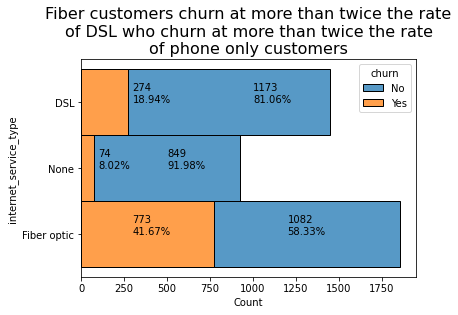

In [160]:
sns.histplot(data=train, y='internet_service_type', hue='churn', multiple='stack')
plt.title('Fiber customers churn at more than twice the rate\n\
of DSL who churn at more than twice the rate\nof phone only customers',fontdict={'fontsize':16})
plt.text(300, 'DSL',f'{isty[1]}\n{Percent(isty[1]/(isty[1]+istn[0]))}')
plt.text(1000, 'DSL',f'{istn[0]}\n{Percent(istn[0]/(isty[1]+istn[0]))}')
plt.text(100, 'None',f'{isty[2]}\n{Percent(isty[2]/(isty[2]+istn[2]))}')
plt.text(500, 'None',f'{istn[2]}\n{Percent(istn[2]/(isty[2]+istn[2]))}')
plt.text(300, 'Fiber optic',f'{isty[0]}\n{Percent(isty[0]/(isty[0]+istn[1]))}')
plt.text(1200, 'Fiber optic',f'{istn[1]}\n{Percent(istn[1]/(isty[0]+istn[1]))}')
plt.show()

In [118]:
isty = train['internet_service_type'][df.churn == 'Yes'].value_counts()
isty

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [119]:
istn = train['internet_service_type'][df.churn == 'No'].value_counts()
istn

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='online_security'>

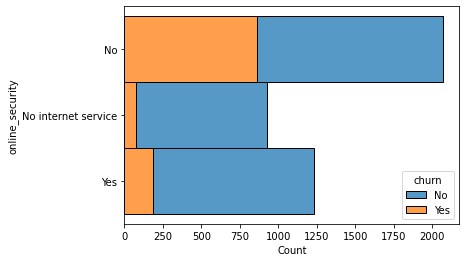

In [50]:
sns.histplot(data=train, y='online_security', hue='churn', multiple='stack')

In [51]:
train['online_security'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [52]:
train['online_security'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='online_backup'>

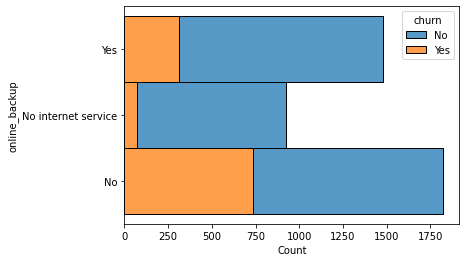

In [53]:
sns.histplot(data=train, y='online_backup', hue='churn', multiple='stack')

In [54]:
train['online_backup'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [55]:
train['online_backup'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='device_protection'>

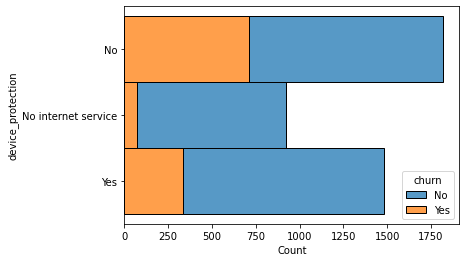

In [56]:
sns.histplot(data=train, y='device_protection', hue='churn', multiple='stack')

In [57]:
train['device_protection'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [58]:
train['device_protection'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='tech_support'>

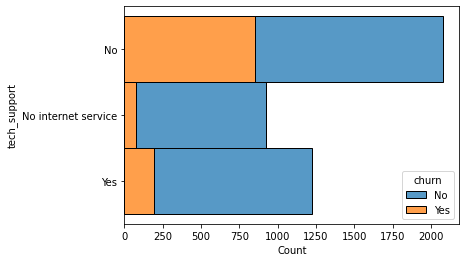

In [59]:
sns.histplot(data=train, y='tech_support', hue='churn', multiple='stack')

In [60]:
train['tech_support'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [61]:
train['tech_support'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='streaming_tv'>

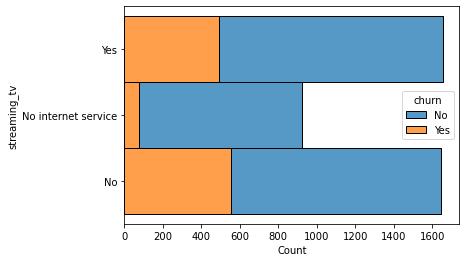

In [62]:
sns.histplot(data=train, y='streaming_tv', hue='churn', multiple='stack')

In [63]:
train['streaming_tv'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [64]:
train['streaming_tv'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='streaming_movies'>

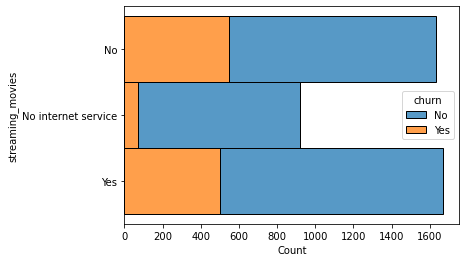

In [65]:
sns.histplot(data=train, y='streaming_movies', hue='churn', multiple='stack')

In [66]:
train['streaming_movies'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [67]:
train['streaming_movies'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# People with streaming_tv or movies churn at similar rates<br><br>But people without online_security, backup, tech support, and device protection churn at higher rates

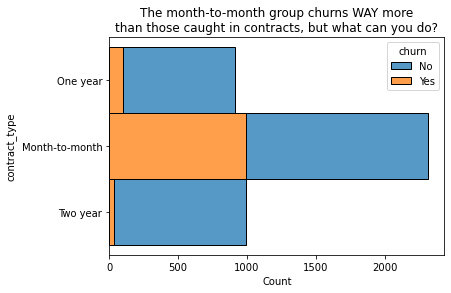

In [126]:
sns.histplot(data=train, y='contract_type', hue='churn', multiple='stack')
plt.title('The month-to-month group churns WAY more\nthan those caught in contracts, but what can you do?')
plt.show()

In [69]:
train['contract_type'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [70]:
train['contract_type'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

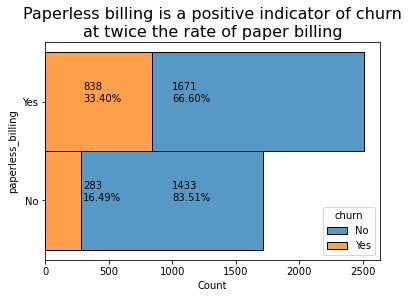

In [165]:
sns.histplot(data=train, y='paperless_billing', hue='churn', multiple='stack')
plt.title('Paperless billing is a positive indicator of churn\nat twice the rate of paper billing', 
          fontdict={'fontsize':16}
         )
plt.text(300, 'Yes', f'838\n{Percent(838/(838+1671))}')
plt.text(1000, 'Yes', f'{1671}\n{Percent(1671/(838+1671))}')
plt.text(300, 'No', f'{283}\n{Percent(283/(283+1433))}')
plt.text(1000, 'No', f'{1433}\n{Percent(1433/(283+1433))}')

plt.show()

In [72]:
train['paperless_billing'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [73]:
train['paperless_billing'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

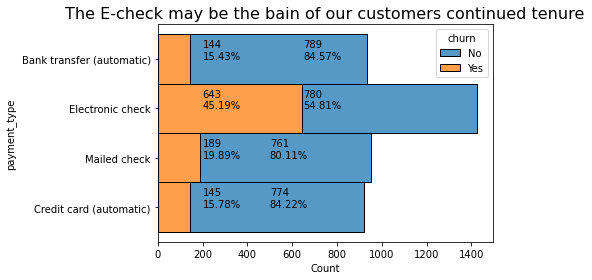

In [166]:
sns.histplot(data=train, y='payment_type', hue='churn', multiple='stack')
plt.title('The E-check may be the bain of our customers continued tenure',
          fontdict={'fontsize':16}
         )
# Bank transfer (automatic)
plt.text(200, 'Bank transfer (automatic)', f'{144}\n{Percent(144/(144+789))}')
plt.text(650, 'Bank transfer (automatic)', f'{789}\n{Percent(789/(144+789))}')

# Electronic Check
plt.text(200, 'Electronic check', f'{643}\n{Percent(643/(643+780))}')
plt.text(650, 'Electronic check', f'{780}\n{Percent(780/(643+780))}')

# Mailed Check
plt.text(200, 'Mailed check', f'{189}\n{Percent(189/(189+761))}')
plt.text(500, 'Mailed check', f'{761}\n{Percent(761/(189+761))}')

# Credit Card
plt.text(200, 'Credit card (automatic)', f'{145}\n{Percent(145/(145+774))}')
plt.text(500, 'Credit card (automatic)', f'{774}\n{Percent(774/(145+774))}')

plt.show()

In [147]:
train['payment_type'][df.churn == 'Yes'].value_counts(sort=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [148]:
train['payment_type'][df.churn == 'No'].value_counts(sort=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

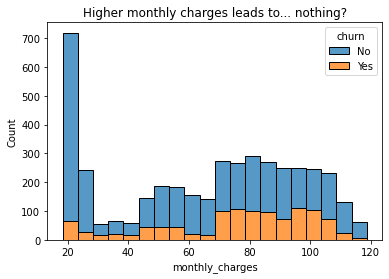

In [172]:
sns.histplot(data=train, x='monthly_charges', hue='churn', multiple='stack', bins=20)
plt.title('Higher monthly charges leads to... nothing?')
plt.show()

In [78]:
train['monthly_charges'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [79]:
train['monthly_charges'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

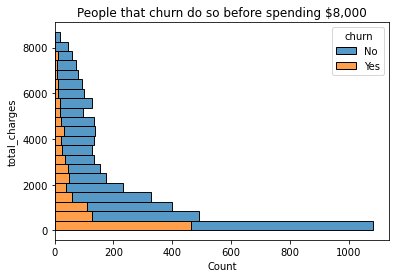

In [173]:
sns.histplot(data=train, y='total_charges', hue='churn', multiple='stack')
plt.title('People that churn do so before spending $8,000')
plt.show()

In [81]:
train['total_charges'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [82]:
train['total_charges'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# What are some of our takeaways thus far?

  - Things that aren't related to churn...
    - gender - they churn evenly
      - Can probably drop this field and not use it as a feature
    - phone servie
      - Everyone has phone service except a portion of the DSL customers
    - multiple lines
      - Multiple lines seems to line up with the DSL customers that do have phone
  - Things that don't matter much...
    - senior citizens - don't make up a great deal of customers
    - Streaming_tv
    - Streaming_movies
  - Things that seem to have a relationship to churn...
    - partner - no partner has more churn
    - dependents - no dependents has more churn
    - Fiber - DSL - No ISP 42%/19%/8% Churn
    - online backup      - not having leads to churn
    - online security    - not having leads to churn
    - device protection  - not having leads to churn
    - tech support       - not having leads to churn
    - Electronic check seems to be the LARGEST indicator of churn
      - 45% of customers using E-checks churn

In [271]:
drop_columns = ['gender', 'phone_service', 'multiple_lines', 'streaming_tv', 'streaming_movies']

In [178]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   internet_service_type  4225 non-null   object 
 9   online_security        4225 non-null   object 
 10  online_backup          4225 non-null   object 
 11  device_protection      4225 non-null   object 
 12  tech_support           4225 non-null   object 
 13  streaming_tv           4225 non-null   object 
 14  streaming_movies       4225 non-null   object 
 15  c

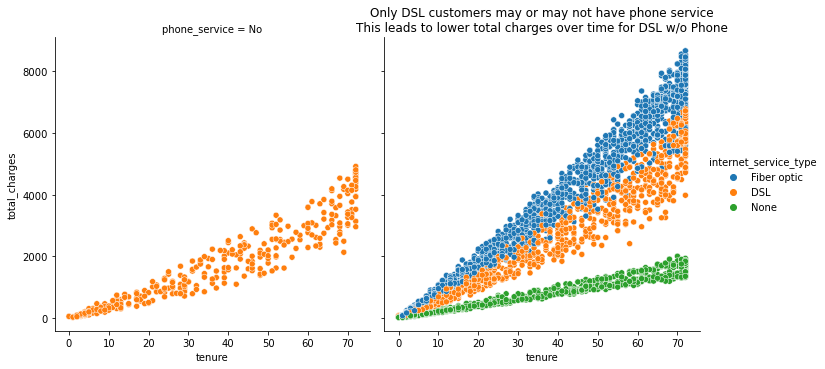

In [183]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='phone_service'
           )
plt.title('Only DSL customers may or may not have phone service\n\
This leads to lower total charges over time for DSL w/o Phone')
plt.show()

In [190]:
DSLy = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'Yes')])

In [191]:
DSLn = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'No')])

In [192]:
print(f'''
People with DSL+Phone make up: {Percent(DSLy/(DSLy+DSLn))}

While those with DSL and no Phone: {Percent(DSLn/(DSLy+DSLn))}
''')


People with DSL+Phone make up: 72.84%

While those with DSL and no Phone: 27.16%



In [193]:
train.internet_service_type[(train.internet_service_type == 'Fiber optic')\
                            & (train.phone_service == 'No')]


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Questions I have
  - Are people with Fiber optic forced to have phone service also?
    - The DSL group has over a quater (27.16%) of users with no phone,<br> and Fiber optic customers have phone service 100% of the time

### Let's see what's a little deeper here...
  - Maybe we should separate the classes of customers to see if they all have the same drivers
  - Might also just drop everyone that hasn't had a chance to churn yet (they don't tell us anything)

In [195]:
# Find the names of the contract types so we can start fidling
train.contract_type.value_counts(dropna=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [198]:
# If contract type is Two year, and the tenure is under 25 months they couldn't have churned
train[(train.contract_type == 'Two year')&(train.tenure < 25)].churn.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [214]:
# This is interesting... Customer with a 1-year contract churning on month 2
train[(train.contract_type == 'One year')&(train.tenure < 3)].churn.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [215]:
# Phone only customer, mailed check
train[(train.contract_type == 'One year')&(train.tenure < 3)&(train.churn == 'Yes')]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [222]:
train[(train.contract_type == 'One year')&(train.tenure < 10)].churn.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [223]:
# Next is a DSL customer with no add on services and automatic Bank Transfer at 9 months
train[(train.contract_type == 'One year')&(train.tenure < 10)&(train.churn == 'Yes')]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [226]:
train[(train.contract_type == 'One year')&(train.tenure < 13)].churn.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [263]:
# get the index of the one year contract drops
one_year_drops = train[(train.contract_type == 'One year')&(train.tenure < 13)].index
# get the index of the two year contract drops
two_year_drops = train[(train.contract_type == 'Two year')&(train.tenure < 25)].index
# cast both.tolist() and addd them together to have an index to drop from train
contract_drops = one_year_drops.tolist()+two_year_drops.tolist()

In [227]:
# Next is a DSL customer with no add on services and automatic Bank Transfer at 9 months
train[(train.contract_type == 'One year')&(train.tenure < 13)&(train.churn == 'Yes')]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='tenure', ylabel='churn1'>

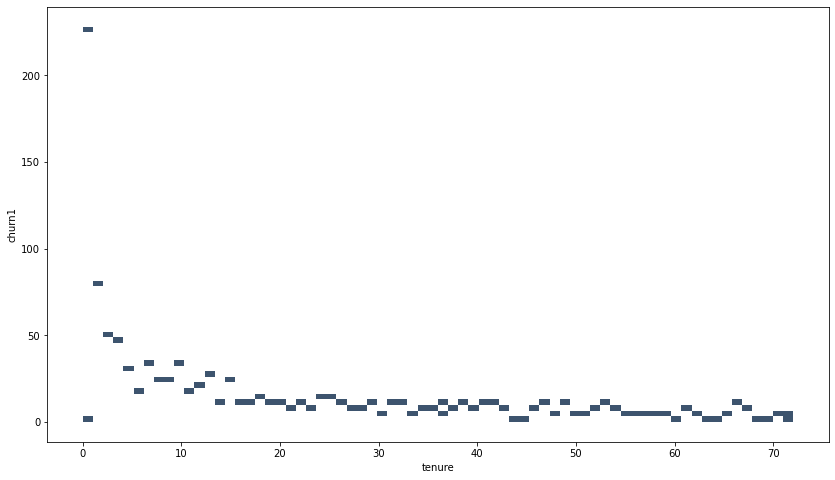

In [276]:
plt.figure(figsize=(14,8))
sns.histplot(data=tenure_churn, x='tenure', y='churn1', bins=70)

In [242]:
train['churn1'] = train.churn == "Yes"

In [274]:
train['churn1'] = train['churn1'].map({False: 0, True:1})

In [275]:
train['churn1']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [248]:
tenure_churn = train[['tenure', 'churn1']].groupby('tenure').sum()

In [266]:
 train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   internet_service_type  4225 non-null   object 
 9   online_security        4225 non-null   object 
 10  online_backup          4225 non-null   object 
 11  device_protection      4225 non-null   object 
 12  tech_support           4225 non-null   object 
 13  streaming_tv           4225 non-null   object 
 14  streaming_movies       4225 non-null   object 
 15  c

In [267]:
train.drop(index=contract_drops, inplace=True)

In [280]:
drop_columns

['gender',
 'phone_service',
 'multiple_lines',
 'streaming_tv',
 'streaming_movies',
 'churn',
 'null_charges',
 'cutomer_id']

In [278]:
drop_columns += ['churn', 'null_charges', 'cutomer_id']
# love when I make a typo that breaks my code and I hvae to rewrite/run code, copy and paste...

In [281]:
# copy paste and fix the typo
drop_columns = ['gender',
 'phone_service',
 'multiple_lines',
 'streaming_tv',
 'streaming_movies',
 'churn',
 'null_charges',
 'customer_id']

In [289]:
train.drop(columns=drop_columns, inplace=True)

In [283]:
train[['partner', 
       'dependents', 
       'online_security', 
       'online_backup', 
       'device_protection', 
       'tech_support', 
       'paperless_billing']].map({'Yes': 1, 'No': 0, 'No internet service': 0})

AttributeError: 'LuxDataFrame' object has no attribute 'map'

In [285]:
train.partner = train.partner.map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [286]:
train.partner

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [287]:
# train.dependents = train.dependents.map({'Yes': 1, 'No': 0, 'No internet service': 0})
# train.online_backup = train.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0})
# train.online_security = train.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0}
for i in train[['dependents', 
       'online_security', 
       'online_backup', 
       'device_protection', 
       'tech_support', 
       'paperless_billing']]:
    train[i] = train[i].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [290]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [291]:
dummy_list = ['internet_service_type', 'contract_type', 'payment_type']

In [293]:
dummies = pd.get_dummies(train[dummy_list])

In [296]:
train = pd.concat([train, dummies], axis=1)

In [298]:
train['add_ons'] = train.online_backup + train.online_security + train.device_protection + train.tech_support

In [300]:
train.add_ons

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [301]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4057 entries, 5911 to 2127
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          4057 non-null   int64  
 1   partner                                 4057 non-null   int64  
 2   dependents                              4057 non-null   int64  
 3   tenure                                  4057 non-null   int64  
 4   internet_service_type                   4057 non-null   object 
 5   online_security                         4057 non-null   int64  
 6   online_backup                           4057 non-null   int64  
 7   device_protection                       4057 non-null   int64  
 8   tech_support                            4057 non-null   int64  
 9   contract_type                           4057 non-null   object 
 10  paperless_billing                       4057 non-null   i

In [302]:
drop_dummies = ['internet_service_type', 
               'online_security', 
               'online_backup', 
               'device_protection', 
               'tech_support',
               'contract_type',
               'payment_type',
               'internet_service_type_None',
               'contract_type_Month-to-month',
               'payment_type_Mailed check'
              ]

In [304]:
train.drop(columns=drop_dummies, inplace=True)
train.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 4057 entries, 5911 to 2127
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          4057 non-null   int64  
 1   partner                                 4057 non-null   int64  
 2   dependents                              4057 non-null   int64  
 3   tenure                                  4057 non-null   int64  
 4   paperless_billing                       4057 non-null   int64  
 5   monthly_charges                         4057 non-null   float64
 6   total_charges                           4057 non-null   float64
 7   churn1                                  4057 non-null   int64  
 8   internet_service_type_DSL               4057 non-null   uint8  
 9   internet_service_type_Fiber optic       4057 non-null   uint8  
 10  contract_type_One year                  4057 non-null   u

In [306]:
train.columns = ['senior', 'partner', 'dependents', 'tenure',
       'e_bill', 'monthly_charges', 'total_charges', 'churn1',
       'DSL', 'Fiber',
       'one_year', 'two_year',
       'bank_transfer',
       'cc', 'e_check',
       'add_ons']

In [307]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()